In [1]:
# Importing libraries
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Objective
The goal is to predict whether a food delivery will be "Fast" or "Delayed" based on features like customer location, restaurant location, weather, traffic conditions, and more. This dataset can be used to explore clustering and neural network models for predictive analytics.

## Phase 1 - Data Preprocessing and Feature Engineering

In [2]:
# Loading dataset
df = pd.read_csv("Food_Delivery_Time_Prediction.csv")
df.head()

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,Rainy,Medium,4,Medium,Afternoon,Car,4.1,3.0,26.22,1321.10,81.54
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,Cloudy,Medium,8,Low,Night,Car,4.5,4.2,62.61,152.21,29.02
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,Snowy,Medium,9,High,Night,Bike,3.3,3.4,48.43,1644.38,64.17
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,Cloudy,Low,2,Medium,Evening,Bike,3.2,3.7,111.63,541.25,79.23
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,Rainy,High,6,Low,Night,Bike,3.5,2.8,32.38,619.81,2.34


In [3]:
# Dataframe Summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Order_ID                    200 non-null    object 
 1   Customer_Location           200 non-null    object 
 2   Restaurant_Location         200 non-null    object 
 3   Distance                    200 non-null    float64
 4   Weather_Conditions          200 non-null    object 
 5   Traffic_Conditions          200 non-null    object 
 6   Delivery_Person_Experience  200 non-null    int64  
 7   Order_Priority              200 non-null    object 
 8   Order_Time                  200 non-null    object 
 9   Vehicle_Type                200 non-null    object 
 10  Restaurant_Rating           200 non-null    float64
 11  Customer_Rating             200 non-null    float64
 12  Delivery_Time               200 non-null    float64
 13  Order_Cost                  200 non

In [4]:
# Null value identification
df.isna().sum()

Order_ID                      0
Customer_Location             0
Restaurant_Location           0
Distance                      0
Weather_Conditions            0
Traffic_Conditions            0
Delivery_Person_Experience    0
Order_Priority                0
Order_Time                    0
Vehicle_Type                  0
Restaurant_Rating             0
Customer_Rating               0
Delivery_Time                 0
Order_Cost                    0
Tip_Amount                    0
dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder
# Label Encoding
df_categorical = ["Weather_Conditions",	"Traffic_Conditions", "Order_Priority", "Order_Time", "Vehicle_Type"]

le = LabelEncoder()
for i in df_categorical:
    df[i] = le.fit_transform(df[i])

In [6]:
df.head()

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,1,2,4,2,0,2,4.1,3.0,26.22,1321.10,81.54
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,0,2,8,1,3,2,4.5,4.2,62.61,152.21,29.02
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,2,2,9,0,3,1,3.3,3.4,48.43,1644.38,64.17
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,0,1,2,2,1,1,3.2,3.7,111.63,541.25,79.23
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,1,0,6,1,3,1,3.5,2.8,32.38,619.81,2.34


In [7]:
# Feature Engineering
df['Customer_Location'] = df['Customer_Location'].apply(lambda x: tuple(map(float, ast.literal_eval(x))))
df['Restaurant_Location'] = df['Restaurant_Location'].apply(lambda x: tuple(map(float, ast.literal_eval(x))))

# Extract lat/lon
df[['Customer_Lat', 'Customer_Lon']] = pd.DataFrame(df['Customer_Location'].tolist(), index=df.index)
df[['Restaurant_Lat', 'Restaurant_Lon']] = pd.DataFrame(df['Restaurant_Location'].tolist(), index=df.index)

# Drop original location columns
df.drop(['Customer_Location', 'Restaurant_Location'], axis=1, inplace=True)

In [8]:
# Haversine function
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in km
    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    dphi = np.radians(lat2 - lat1)
    dlambda = np.radians(lon2 - lon1)
    a = np.sin(dphi/2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(dlambda/2)**2
    return 2 * R * np.arcsin(np.sqrt(a))


df['Haversine_Distance'] = haversine(df['Customer_Lat'], df['Customer_Lon'], df['Restaurant_Lat'], df['Restaurant_Lon'])

In [9]:
# Add target column: Fast (0) if delivery_time <= median else Delayed (1)
median_time = df['Delivery_Time'].median()
df['Delivery_Status'] = (df['Delivery_Time'] > median_time).astype(int)

In [10]:
df.head()

,Order_ID,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount,Customer_Lat,Customer_Lon,Restaurant_Lat,Restaurant_Lon,Haversine_Distance,Delivery_Status
0,ORD0001,1.57,1,2,4,2,0,2,4.1,3.0,26.22,1321.10,81.54,17.030479,79.743077,12.358515,85.100083,775.651198,0
1,ORD0002,21.32,0,2,8,1,3,2,4.5,4.2,62.61,152.21,29.02,15.398319,86.639122,14.174874,77.025606,1042.385597,0
2,ORD0003,6.95,2,2,9,0,3,1,3.3,3.4,48.43,1644.38,64.17,15.687342,83.888808,19.594748,82.048482,476.220706,0
3,ORD0004,13.79,0,1,2,2,1,1,3.2,3.7,111.63,541.25,79.23,20.415599,78.046984,16.915906,78.278698,389.912629,1
4,ORD0005,6.72,1,0,6,1,3,1,3.5,2.8,32.38,619.81,2.34,14.786904,78.706532,15.206038,86.203182,806.505886,0


In [11]:
from sklearn.preprocessing import StandardScaler
# Select numerical columns for scaling
numeric_cols = ['Distance', 'Delivery_Person_Experience', 'Restaurant_Rating', 'Customer_Rating', 'Delivery_Time', 'Order_Cost', 'Tip_Amount', 'Haversine_Distance']

# Apply standard scaling
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [12]:
df.head()

,Order_ID,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount,Customer_Lat,Customer_Lon,Restaurant_Lat,Restaurant_Lon,Haversine_Distance,Delivery_Status
0,ORD0001,-1.454738,1,2,-0.456512,2,0,2,0.515500,-0.987317,-1.487932,0.501852,1.192403,17.030479,79.743077,12.358515,85.100083,0.641395,0
1,ORD0002,1.439192,0,2,1.004325,1,3,2,1.085900,0.738511,-0.264987,-1.634294,-0.600810,15.398319,86.639122,14.174874,77.025606,1.632526,0
2,ORD0003,-0.666417,2,2,1.369535,0,3,1,-0.625302,-0.412041,-0.741529,1.092646,0.599332,15.687342,83.888808,19.594748,82.048482,-0.471227,0
3,ORD0004,0.335835,0,1,-1.186930,2,1,1,-0.767902,0.019416,1.382411,-0.923323,1.113532,20.415599,78.046984,16.915906,78.278698,-0.791930,1
4,ORD0005,-0.700119,1,0,0.273907,1,3,1,-0.340101,-1.274955,-1.280915,-0.779755,-1.511757,14.786904,78.706532,15.206038,86.203182,0.756045,0


In [13]:
# Time related features: Rush Hour (1) and Non-Rush Hour (0)
# Create binary rush hour feature
df['Rush_Hour'] = df['Order_Time'].apply(lambda x: 1 if x in ['Morning', 'Evening'] else 0)

## Phase 2 - Clustering using K-Means and Hierarchical Clustering
### K-Means Clustering

In [14]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Drop non-numeric or identifier columns before clustering
features_for_clustering = df.drop(columns=['Order_ID'])

# Apply PCA to reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_for_clustering)

In [15]:
# Elbow Method to find optimal number of clusters
inertia = []
k_range = range(1, 11)
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(features_for_clustering)
    inertia.append(km.inertia_)

C:\Users\EL-Dorado\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\EL-Dorado\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\EL-Dorado\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\EL-Dorado\AppData\Roaming\Python\Python312\site-packages\s

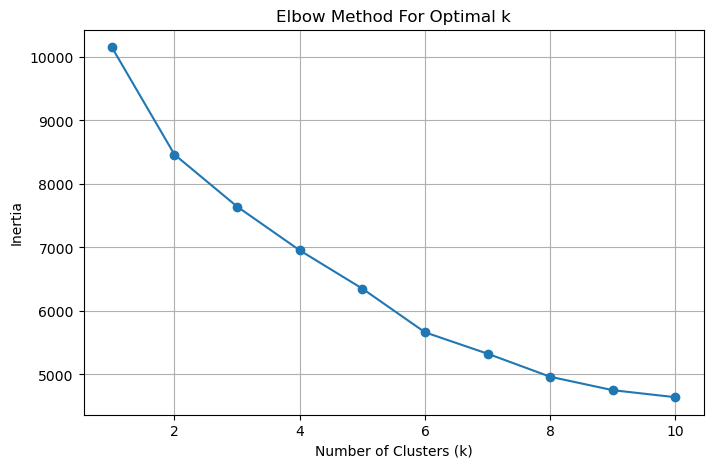

In [16]:
# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [17]:
# Proceeding with KMeans clustering, using k=3 
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(features_for_clustering)

# Reduce dimensionality for visualization
pca = PCA(n_components=2)
components = pca.fit_transform(features_for_clustering)

C:\Users\EL-Dorado\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


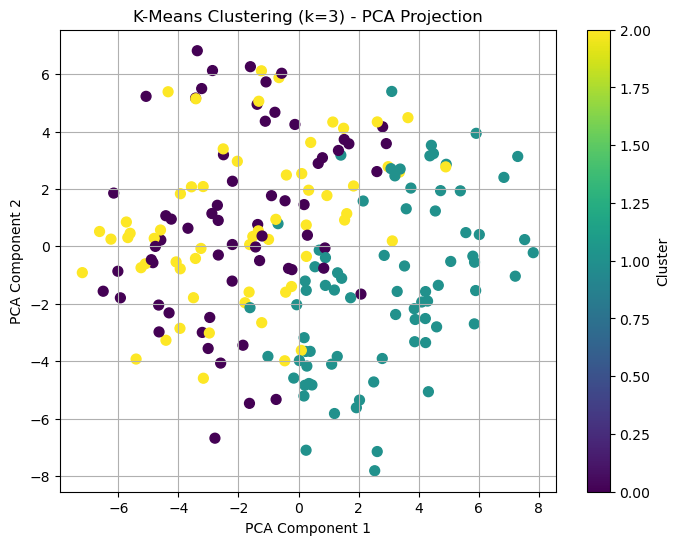

In [18]:
# Plot the clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(components[:, 0], components[:, 1], c=df['Cluster'], cmap='viridis', s=50)
plt.title(f'K-Means Clustering (k={k}) - PCA Projection')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()

In [19]:
# Analyze delivery time across clusters
cluster_stats = df.groupby('Cluster')['Delivery_Time'].agg(['count', 'mean', 'std', 'min', 'max']).reset_index()
cluster_stats.columns = ['Cluster', 'Count', 'Avg_Delivery_Time', 'Std_Dev', 'Min_Time', 'Max_Time']
cluster_stats

,Cluster,Count,Avg_Delivery_Time,Std_Dev,Min_Time,Max_Time
0,0,63,0.026719,0.969622,-1.798458,1.623370
1,1,77,0.042946,0.997226,-1.815261,1.652608
2,2,60,-0.083169,1.053877,-1.857269,1.645551


### Hierarchical Clustering

In [20]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

features_hc = df.drop(columns=['Order_ID', 'Delivery_Time', 'Delivery_Status', 'Cluster', 'HC_Cluster'], errors='ignore')

linkage_matrix = linkage(features_hc, method='ward')

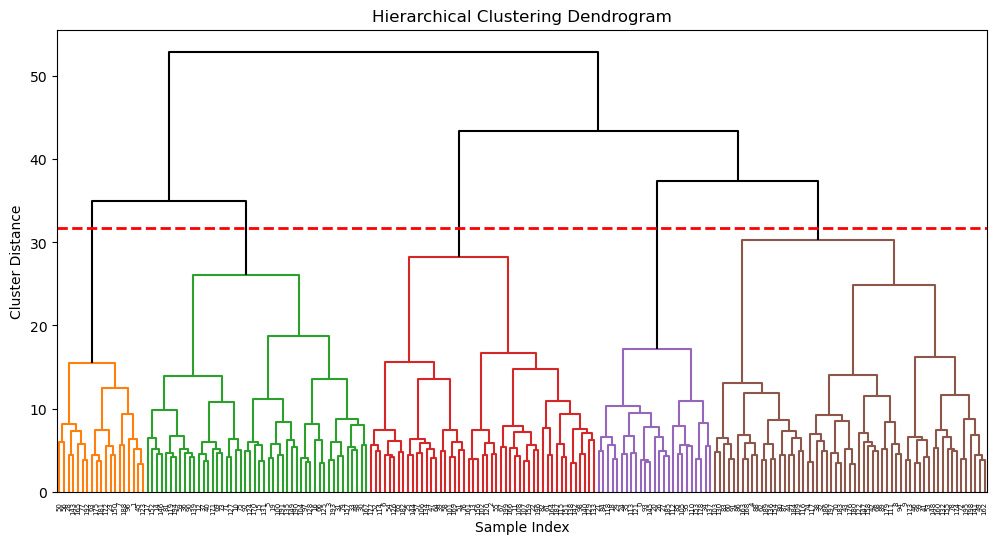

In [21]:
# Determine a cutoff value dynamically (e.g., 60% of max distance)
cutoff_value = np.max(linkage_matrix[:, 2]) * 0.6

plt.figure(figsize=(12, 6))
dendrogram(
    linkage_matrix,
    color_threshold=cutoff_value,
    above_threshold_color='black',
    show_leaf_counts=True)

plt.axhline(y=cutoff_value, color='red', linestyle='--', linewidth=2)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Cluster Distance")
plt.show()

In [22]:
# Choose number of clusters from dendrogram
n_clusters_hc = 3

hc_model = AgglomerativeClustering(n_clusters=n_clusters_hc)
df['HC_Cluster'] = hc_model.fit_predict(features_hc)

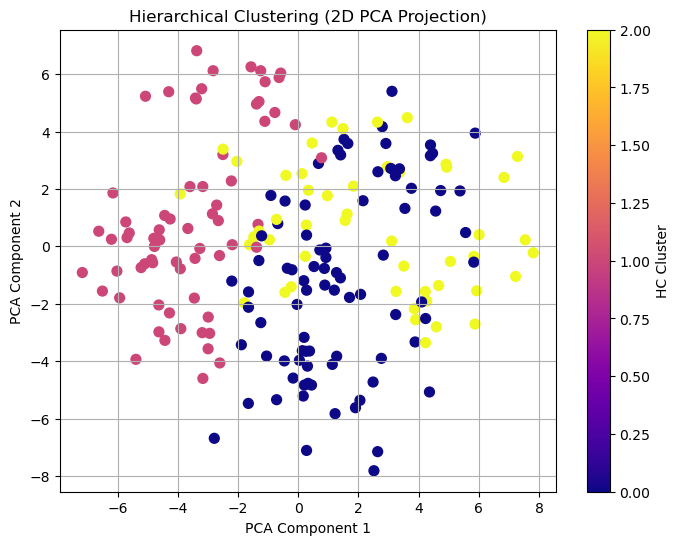

In [23]:
pca = PCA(n_components=2)
proj = pca.fit_transform(features_hc)

plt.figure(figsize=(8, 6))
plt.scatter(proj[:, 0], proj[:, 1], c=df['HC_Cluster'], cmap='plasma', s=50)
plt.title("Hierarchical Clustering (2D PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='HC Cluster')
plt.grid(True)
plt.show()

In [24]:
hc_stats = df.groupby('HC_Cluster')['Delivery_Time'].agg(
    ['count', 'mean', 'std', 'min', 'max']).reset_index()

hc_stats.columns = ['HC_Cluster', 'Count', 'Avg_Delivery_Time', 'Std_Dev', 'Min_Time', 'Max_Time']
hc_stats

,HC_Cluster,Count,Avg_Delivery_Time,Std_Dev,Min_Time,Max_Time
0,0,84,0.040990,1.036495,-1.815261,1.623370
1,1,67,-0.094114,0.974810,-1.850884,1.645551
2,2,49,0.058419,0.991765,-1.857269,1.652608


In [25]:
# Compare with K-Means Clusters 
if 'Cluster' in df.columns:
    comparison = df.groupby(['HC_Cluster', 'Cluster'])['Delivery_Time'].count().unstack().fillna(0)
    print("\nHierarchical vs KMeans Cluster Counts:")
    print(comparison)


Hierarchical vs KMeans Cluster Counts:
Cluster        0     1     2
HC_Cluster                  
0           23.0  57.0   4.0
1           40.0   0.0  27.0
2            0.0  20.0  29.0


## Phase 3 - Neural Networks for Prediction

In [26]:
# Features and Targets
X = df.drop(columns=['Order_ID', 'Delivery_Time', 'Delivery_Status', 'Cluster', 'HC_Cluster'], errors='ignore')
y = df['Delivery_Status']

In [27]:
# Train-Test Split
from sklearn.model_selection import train_test_split

# 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((160, 17), (40, 17), (160,), (40,))

In [28]:
# Building Neural Network
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Neural network
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X.shape[1],)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid') ])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
# Model training
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.5395 - loss: 4.8621 - val_accuracy: 0.5000 - val_loss: 2.0188
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5049 - loss: 3.6370 - val_accuracy: 0.3750 - val_loss: 0.8066
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4324 - loss: 2.7502 - val_accuracy: 0.3250 - val_loss: 0.7869
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4672 - loss: 2.7165 - val_accuracy: 0.4250 - val_loss: 0.7835
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4905 - loss: 2.4480 - val_accuracy: 0.5000 - val_loss: 0.8605
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5528 - loss: 1.6974 - val_accuracy: 0.5000 - val_loss: 1.0127
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5315 - loss: 1.5675 - val_accuracy: 0.4500 - val_loss: 0.7467
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4359 - loss: 1.8639 - val_accuracy: 0.5000 - val_loss

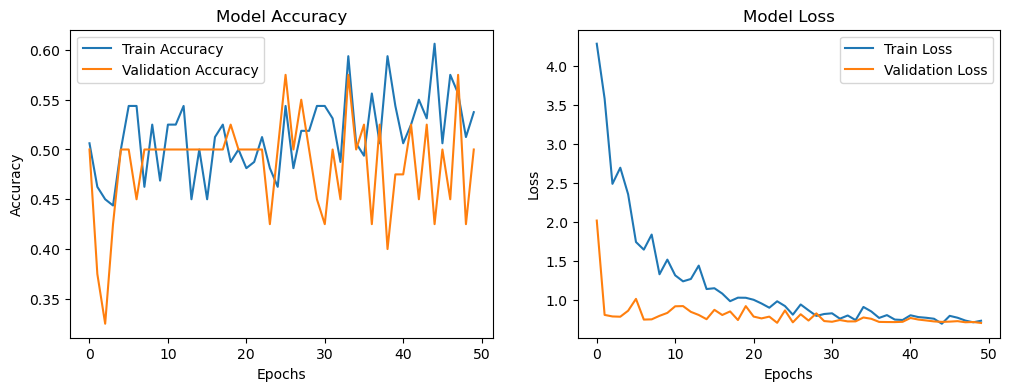

In [30]:
# Plot Accuracy and Loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [31]:
# Evaluate the Model Performance
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.55      0.52        20
           1       0.50      0.45      0.47        20

    accuracy                           0.50        40
   macro avg       0.50      0.50      0.50        40
weighted avg       0.50      0.50      0.50        40


Confusion Matrix:
[[11  9]
 [11  9]]


In [32]:
# Model Improvement
# Improved Neural Network Model
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X.shape[1],)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(32, activation='tanh'),
    keras.layers.Dense(1, activation='sigmoid') ])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
# Model training
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5360 - loss: 0.8359 - val_accuracy: 0.5000 - val_loss: 0.7913
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5395 - loss: 0.7960 - val_accuracy: 0.5000 - val_loss: 0.8172
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5161 - loss: 0.8125 - val_accuracy: 0.4250 - val_loss: 0.7042
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4403 - loss: 0.8285 - val_accuracy: 0.4750 - val_loss: 0.6984
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5332 - loss: 0.7714 - val_accuracy: 0.4750 - val_loss: 0.7026
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4327 - loss: 0.8579 - val_accuracy: 0.5000 - val_loss: 0.7303
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4421 - loss: 0.7865 - val_accuracy: 0.5000 - val_loss: 0.7246
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4276 - loss: 0.8322 - val_accuracy: 0.5000 - val_los

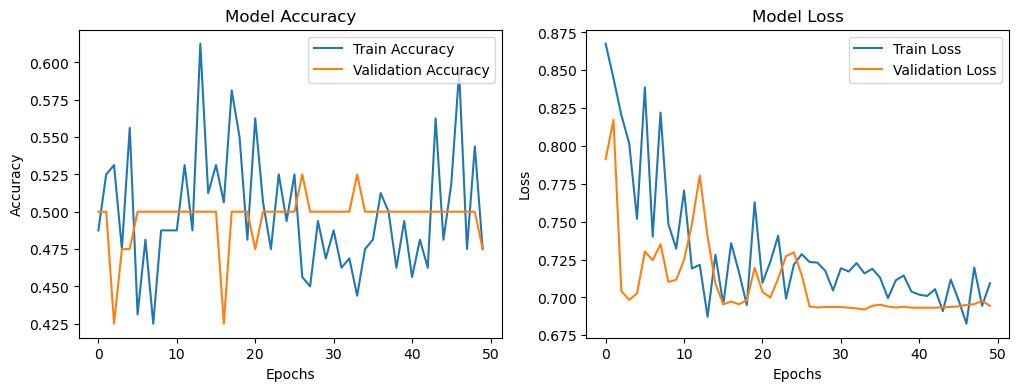

In [34]:
# Plot Accuracy and Loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [35]:
# Evaluate Model
y_pred_nn = (model.predict(X_test) > 0.5).astype(int)

print("Neural Network Classification Report:")
print(classification_report(y_test, y_pred_nn))
print("Neural Network Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nn))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.75      0.59        20
           1       0.44      0.20      0.28        20

    accuracy                           0.47        40
   macro avg       0.46      0.47      0.43        40
weighted avg       0.46      0.47      0.43        40

Neural Network Confusion Matrix:
[[15  5]
 [16  4]]


In [36]:
from sklearn.linear_model import LogisticRegression
# Logistic Regression Baseline
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log))
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.55      0.55        20
           1       0.55      0.55      0.55        20

    accuracy                           0.55        40
   macro avg       0.55      0.55      0.55        40
weighted avg       0.55      0.55      0.55        40

Logistic Regression Confusion Matrix:
[[11  9]
 [ 9 11]]


## Phase 4 - Reporting and Insights

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Cluster-wise delivery time analysis
cluster_analysis_kmeans = df.groupby('Cluster')['Delivery_Time'].agg(['count', 'mean', 'median']).rename_axis('KMeans Cluster')
cluster_analysis_hc = df.groupby('HC_Cluster')['Delivery_Time'].agg(['count', 'mean', 'median']).rename_axis('Hierarchical Cluster')

print("K-Means Cluster-wise Delivery Time:")
display(cluster_analysis_kmeans)

print("Hierarchical Cluster-wise Delivery Time:")
display(cluster_analysis_hc)

K-Means Cluster-wise Delivery Time:


,count,mean,median
KMeans Cluster,,,
0,63,0.026719,0.149719
1,77,0.042946,0.111744
2,60,-0.083169,0.020502


Hierarchical Cluster-wise Delivery Time:


,count,mean,median
Hierarchical Cluster,,,
0,84,0.040990,0.155768
1,67,-0.094114,0.044194
2,49,0.058419,0.111744


In [42]:
model_comparison = {
    "Model": ["Neural Network", "Logistic Regression"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_nn),
        accuracy_score(y_test, y_pred_log)
    ],
    "Precision": [
        precision_score(y_test, y_pred_nn),
        precision_score(y_test, y_pred_log)
    ],
    "Recall": [
        recall_score(y_test, y_pred_nn),
        recall_score(y_test, y_pred_log)
    ],
    "F1-Score": [
        f1_score(y_test, y_pred_nn),
        f1_score(y_test, y_pred_log)
    ]}

In [43]:
comparison_df = pd.DataFrame(model_comparison).set_index("Model").round(3)
display(comparison_df)

,Accuracy,Precision,Recall,F1-Score
Model,,,,
Neural Network,0.475,0.444,0.20,0.276
Logistic Regression,0.550,0.550,0.55,0.550


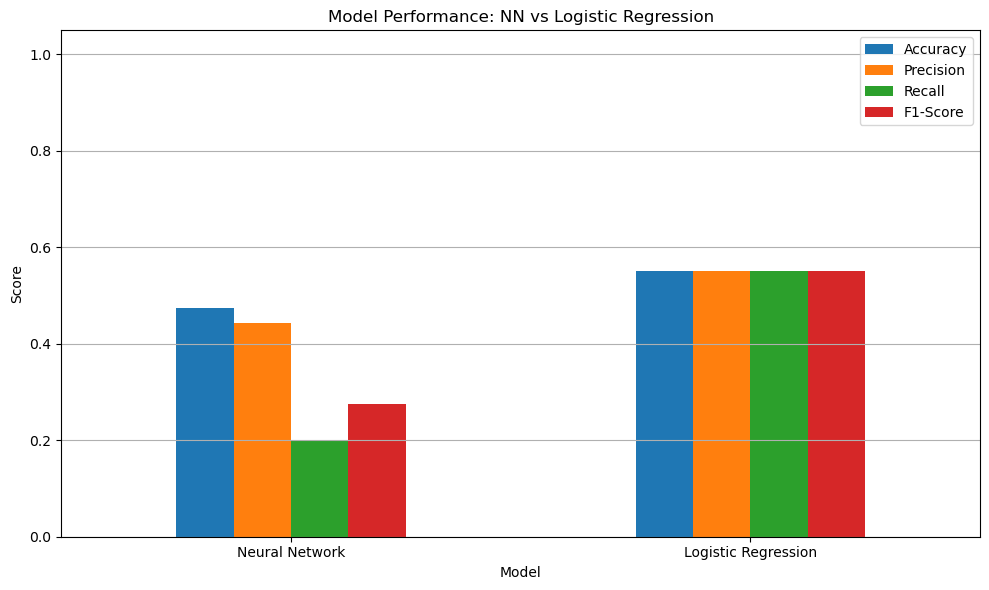

In [46]:
# Comparison Plot
comparison_df.plot(kind='bar', figsize=(10, 6))
plt.title("Model Performance: NN vs Logistic Regression")
plt.ylabel("Score")
plt.ylim(0, 1.05)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### 📌 Actionable Insights

Based on clustering analysis and neural network predictions, here are key recommendations to improve food delivery performance:

#### 1. Optimize Delivery Routes Using Cluster Profiles
- Use K-Means clusters to categorize deliveries by risk factors (e.g., long distances, traffic).
- Prioritize or reroute orders in high-delay clusters using real-time GPS + cluster mapping.
- Implement geofencing to identify congested zones and assign experienced riders.

#### 2. Account for Weather and Traffic Delays
- Cluster patterns show delays are strongly linked to weather and traffic.
- Integrate live traffic and weather APIs into the delivery ETA system.
- Dynamically add buffer time during adverse conditions.

#### 3. Leverage Time-Based Features (Rush Hours)
- "Rush hour" orders have higher delays.
- Allocate more delivery personnel during peak hours.
- Offer customer incentives for off-peak ordering to balance load.

#### 4. Real-Time Delay Prediction with Neural Networks
- Use the neural network model to predict if an order will be "Fast" or "Delayed" before dispatch.
- Trigger alerts for predicted delays and reassign or escalate such orders.
- Enable proactive decision-making by dispatch managers.

#### 5. Improve Order Prioritization and Resource Allocation
- Identify high-priority orders and assign them to top-performing riders.
- Optimize delivery assignments by balancing workload based on model predictions.

#### 6. Build a Continuous Feedback Loop
- Regularly retrain the prediction model using fresh delivery data.
- Monitor cluster behaviors and update features (e.g., traffic zones, weather tags).
- Evaluate changes in performance over time to refine strategy.

### Conclusion & Key Insights
The goal of this assignment is to predict whether a food delivery will be "Fast" or "Delayed" based on features like customer location, restaurant location, weather, traffic conditions, and more. This dataset can be used to explore clustering and neural network models for predictive analytics.
After preprocessing and encoding categorical variables, critical features such as geographical distance were engineered using the Haversine formula. 
K-Means and Hierarchical Clustering were applied to uncover patterns in delivery behavior, influenced by variables like weather and traffic, with the Elbow Method guiding optimal cluster count. Clustering visualization provided useful segmentation insights, although cluster interpretation remained somewhat limited. 
A feedforward neural network was then trained on the processed dataset, achieving an accuracy of 47.5% and an F1-score of 0.276, highlighting model imbalance or overfitting. Despite these limitations, the framework demonstrates potential for operational use. To improve predictive power, recommending the time-based features (e.g., rush hour, day of week), addressing class imbalance, and considering real-time external data like traffic. These enhancements can better inform delivery routing, scheduling, and customer satisfaction strategies.